<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demonstrating Regularization**

## **1️⃣ Sample Dataset That *Will* Overfit**

In order to clearly demonstrate regularization benefits, we need a dataset that will overfit. We want:

* **Very small dataset**
* **Nonlinear target**
* **Moderate noise**
* **Huge model capacity**

### **Dataset Choice: 1D Noisy Sine Wave**

This is ideal because:

* True function is simple
* Noise tempts memorization
* Easy to visualize




### **Setup & Imports**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

### **Generate Small Noisy Dataset**

Dataset is guaranteed to overfit because the training data is very small while the model is very large. This is one of the classical causes of overfit - model too large for dataset.

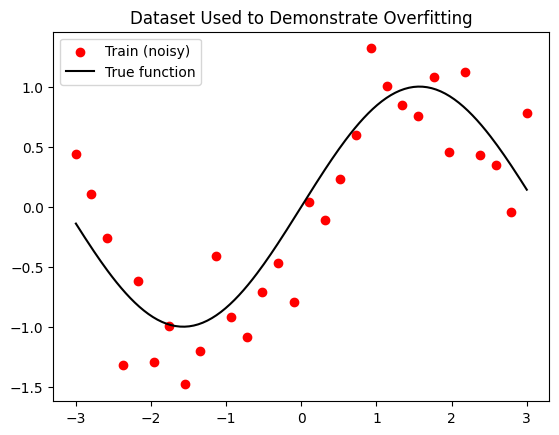

In [ ]:
# Training data (very small)
n_train = 30
x_train = torch.linspace(-3, 3, n_train).unsqueeze(1)
y_train = torch.sin(x_train) + 0.3 * torch.randn_like(x_train)

# Validation data (large & clean)
n_val = 200
x_val = torch.linspace(-3, 3, n_val).unsqueeze(1)
y_val = torch.sin(x_val)

def visualize_dataset(plt, x_train, y_train, x_val, y_val):
    # Visualize
    plt.scatter(x_train.numpy(), y_train.numpy(), label="Train (noisy)", color="red")
    plt.plot(x_val.numpy(), y_val.numpy(), label="True function", color="black")
    plt.legend()
    plt.title("Dataset Used to Demonstrate Overfitting")

visualize_dataset(plt, x_train, y_train, x_val, y_val)

In [ ]:
x_train.shape, y_train.shape

(torch.Size([30, 1]), torch.Size([30, 1]))

📌 **Why this overfits easily**

* Only **30 training points**
* Noise added only to training set
* Validation data reflects true function

---

## **2️⃣ Neural Network Architecture That Overfits Badly**

We deliberately use **massive over-parameterization**.

### **Overfitting Architecture**

In [ ]:
import torch.nn as nn

class OverfitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128),  # 128 * 1 = 128 weights + 128 biases = 256 parameters
            nn.ReLU(),
            nn.Linear(128, 128), # 128 * 128 = 2_14 = 16384 weights + 128 biases = 16512
            nn.ReLU(),
            nn.Linear(128, 128), # 128 * 128 = 2_14 = 16K weights + 128 biases = 16512
            nn.ReLU(),
            nn.Linear(128, 1) # 1 * 128 = 128 weights + 1 bias = 129 parameters
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
total_params = (128 * 1 + 128) + 2 * (128 * 128 + 128) + 129
total_params

33409

In [ ]:
model = OverfitNet()
size = 0
for param in model.parameters():
    size += len(param)

size

770

In [ ]:
for param in model.parameters():
    display(param)

Parameter containing:
tensor([[-0.9104],
        [-0.3693],
        [ 0.0178],
        [ 0.8188],
        [-0.1879],
        [ 0.6769],
        [-0.5790],
        [ 0.3741],
        [ 0.5491],
        [ 0.9743],
        [ 0.1644],
        [-0.4443],
        [ 0.6833],
        [-0.5713],
        [-0.0109],
        [ 0.6538],
        [-0.1910],
        [-0.6103],
        [ 0.9199],
        [-0.0711],
        [-0.1423],
        [ 0.2909],
        [ 0.2739],
        [ 0.8250],
        [ 0.7826],
        [-0.5794],
        [-0.6921],
        [ 0.1774],
        [ 0.3800],
        [-0.9631],
        [-0.3035],
        [-0.0906],
        [-0.0764],
        [ 0.3932],
        [-0.6073],
        [-0.5305],
        [ 0.2686],
        [ 0.0360],
        [ 0.4361],
        [-0.1646],
        [-0.3279],
        [ 0.4078],
        [-0.7762],
        [ 0.1151],
        [ 0.7530],
        [-0.1137],
        [-0.3550],
        [-0.2079],
        [-0.2877],
        [ 0.9404],
        [ 0.8386],
        [

Parameter containing:
tensor([-0.9953, -0.9990,  0.2609, -0.9103, -0.4419,  0.9856,  0.9609,  0.7599,
         0.9073,  0.9479, -0.1986, -0.9458,  0.8167,  0.9083, -0.6255,  0.3277,
         0.1801, -0.3146,  0.4428,  0.1182, -0.9800,  0.1570,  0.2842, -0.3955,
         0.1210, -0.4357,  0.2671,  0.0439, -0.3458,  0.0949,  0.9498,  0.6543,
        -0.7577,  0.8789, -0.5446,  0.8416,  0.6448, -0.2747,  0.9718,  0.1708,
        -0.5913, -0.7643, -0.5320,  0.2692,  0.3538,  0.4447,  0.5742, -0.4450,
        -0.0515,  0.6884, -0.6763, -0.3933, -0.9832,  0.3725,  0.0148,  0.7652,
        -0.1938,  0.7296,  0.5374,  0.8880,  0.7902, -0.2070, -0.9304, -0.8315,
        -0.4415,  0.6325, -0.0639,  0.0255,  0.6316, -0.8193, -0.8656,  0.9352,
         0.0832, -0.7126, -0.3856, -0.8075,  0.5981, -0.2564,  0.7054,  0.1513,
        -0.7216, -0.4651, -0.6149, -0.9576, -0.2370,  0.7156, -0.8774, -0.0985,
         0.3520,  0.4591,  0.9054, -0.6804,  0.0421,  0.1855,  0.9574, -0.5232,
         0.7992,  

Parameter containing:
tensor([[ 0.0635,  0.0641, -0.0335,  ..., -0.0501,  0.0735, -0.0457],
        [-0.0081,  0.0510, -0.0213,  ...,  0.0008,  0.0129,  0.0465],
        [ 0.0508, -0.0392,  0.0767,  ..., -0.0434, -0.0151, -0.0653],
        ...,
        [ 0.0881, -0.0138,  0.0020,  ...,  0.0093,  0.0405,  0.0311],
        [-0.0737,  0.0559, -0.0777,  ...,  0.0832, -0.0173, -0.0792],
        [-0.0510, -0.0208, -0.0193,  ..., -0.0304, -0.0111,  0.0084]],
       requires_grad=True)

Parameter containing:
tensor([ 0.0058,  0.0132,  0.0214, -0.0454, -0.0457,  0.0428, -0.0480, -0.0516,
        -0.0818,  0.0722, -0.0330, -0.0793, -0.0218, -0.0425, -0.0211,  0.0675,
        -0.0109,  0.0257,  0.0614,  0.0641,  0.0591, -0.0869, -0.0178,  0.0271,
        -0.0816, -0.0323,  0.0602, -0.0560,  0.0539,  0.0553,  0.0455,  0.0266,
        -0.0468, -0.0475,  0.0183,  0.0154, -0.0400,  0.0335, -0.0024,  0.0311,
         0.0316, -0.0199,  0.0692, -0.0659, -0.0225,  0.0195,  0.0430, -0.0068,
         0.0073,  0.0780,  0.0853, -0.0780, -0.0572, -0.0335, -0.0206, -0.0681,
        -0.0532, -0.0405,  0.0028,  0.0422, -0.0352,  0.0808, -0.0334,  0.0045,
         0.0875,  0.0223, -0.0385,  0.0346,  0.0078,  0.0052,  0.0773, -0.0252,
         0.0475,  0.0365, -0.0618,  0.0305,  0.0107,  0.0775, -0.0020,  0.0034,
        -0.0281, -0.0676,  0.0520,  0.0368,  0.0548, -0.0782,  0.0689, -0.0754,
        -0.0308,  0.0042, -0.0341, -0.0265,  0.0495, -0.0172,  0.0095,  0.0683,
         0.0218,  

Parameter containing:
tensor([[ 0.0816,  0.0836,  0.0045,  ...,  0.0522,  0.0716,  0.0616],
        [ 0.0015,  0.0100,  0.0428,  ..., -0.0782, -0.0416, -0.0686],
        [-0.0491,  0.0702, -0.0081,  ..., -0.0337, -0.0780, -0.0237],
        ...,
        [-0.0822, -0.0281,  0.0549,  ...,  0.0833,  0.0814, -0.0551],
        [-0.0373,  0.0743,  0.0799,  ..., -0.0558, -0.0606,  0.0753],
        [-0.0445, -0.0005, -0.0297,  ...,  0.0440, -0.0486, -0.0877]],
       requires_grad=True)

Parameter containing:
tensor([ 0.0316, -0.0192,  0.0016,  0.0440,  0.0694,  0.0277,  0.0418,  0.0739,
         0.0016, -0.0558,  0.0455, -0.0294, -0.0543, -0.0791,  0.0380, -0.0512,
         0.0805,  0.0448,  0.0555,  0.0053, -0.0073, -0.0640, -0.0431, -0.0301,
        -0.0112, -0.0350, -0.0216, -0.0435,  0.0550, -0.0724, -0.0151, -0.0046,
         0.0748, -0.0392, -0.0874,  0.0318, -0.0768, -0.0822, -0.0884, -0.0420,
         0.0083, -0.0613, -0.0823,  0.0327, -0.0767, -0.0730, -0.0792, -0.0165,
         0.0459, -0.0454, -0.0314,  0.0323, -0.0269, -0.0492,  0.0542, -0.0313,
        -0.0629,  0.0800, -0.0024, -0.0074,  0.0793,  0.0212, -0.0854, -0.0209,
        -0.0291,  0.0340,  0.0340, -0.0620,  0.0713,  0.0723,  0.0536,  0.0750,
         0.0597,  0.0203, -0.0664,  0.0633, -0.0187,  0.0017, -0.0810, -0.0163,
         0.0486,  0.0314, -0.0538, -0.0446, -0.0666,  0.0572,  0.0152, -0.0056,
        -0.0190, -0.0715, -0.0785,  0.0633, -0.0286,  0.0625, -0.0488, -0.0372,
         0.0349,  

Parameter containing:
tensor([[ 0.0638,  0.0074,  0.0798, -0.0116, -0.0744, -0.0389,  0.0868, -0.0657,
          0.0833,  0.0181,  0.0070,  0.0452, -0.0512, -0.0408, -0.0617,  0.0119,
         -0.0419,  0.0832,  0.0814, -0.0173, -0.0025, -0.0027,  0.0262, -0.0442,
         -0.0131, -0.0757, -0.0827, -0.0014,  0.0030,  0.0823, -0.0201,  0.0042,
         -0.0425,  0.0339, -0.0021, -0.0335, -0.0101,  0.0646, -0.0357,  0.0096,
         -0.0648, -0.0597, -0.0371,  0.0443, -0.0879, -0.0188, -0.0095, -0.0808,
         -0.0280,  0.0494,  0.0409, -0.0550, -0.0420, -0.0727, -0.0856,  0.0472,
          0.0116,  0.0004,  0.0489, -0.0553, -0.0474, -0.0653, -0.0570, -0.0646,
          0.0588,  0.0700,  0.0710, -0.0859,  0.0589,  0.0610,  0.0052,  0.0328,
          0.0088, -0.0669, -0.0046, -0.0324, -0.0664, -0.0877,  0.0215, -0.0004,
         -0.0196,  0.0208,  0.0464, -0.0331, -0.0129, -0.0498,  0.0655, -0.0823,
          0.0636, -0.0661,  0.0149, -0.0185, -0.0631, -0.0282,  0.0280,  0.0449,
      

Parameter containing:
tensor([0.0404], requires_grad=True)

📌 **Why this overfits**

* ~33,000 parameters
* Only 30 training samples
* No constraints
* Deep enough to memorize noise

---

## **3️⃣ Baseline Training Loop (No Regularization)**

This is your **control experiment**.

In [ ]:
def train_model(model, optimizer, epochs=1000, l1_lambda=0.0):
    criterion = nn.MSELoss()
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        # Optional L1 regularization
        if l1_lambda > 0:
            l1_penalty = sum(p.abs().sum() for p in model.parameters())
            loss += l1_lambda * l1_penalty

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_loss = criterion(model(x_val), y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses


def plot_losses(plt, title, train_losses, val_losses):
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.legend()
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")


def plot_model_fit(plt, title, model, x_train, y_train, x_val, y_val):
    plt.scatter(x_train.numpy(), y_train.numpy(), label="Train (noisy)", color="red")
    plt.plot(x_val.numpy(), y_val.numpy(), label="True function", color="grey")
    plt.plot(x_val.numpy(), model(x_val).detach().numpy(), label="Model predicted", color="orange")
    plt.title(title)
    plt.legend()

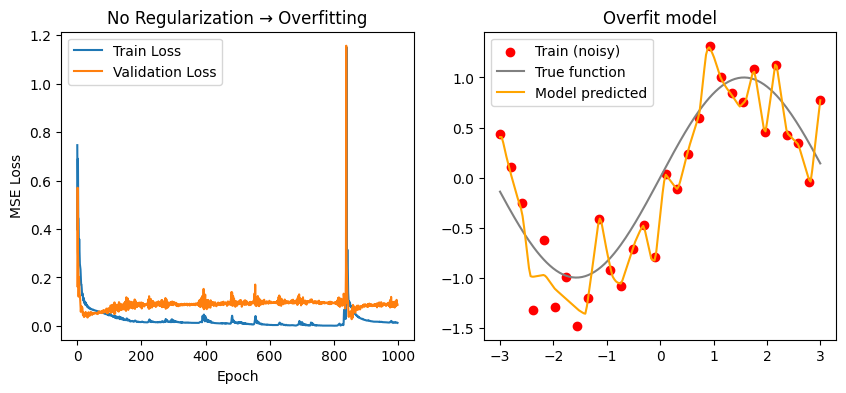

In [ ]:
model = OverfitNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loss, val_loss = train_model(model, optimizer)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "No Regularization → Overfitting", train_loss, val_loss)

plt.subplot(1, 2, 2)
plot_model_fit(plt, "Overfit model", model, x_train, y_train, x_val, y_val)


### **Expected Loss Curve**

* Training loss → **~0**
* Validation loss → **decreases initially, then increases**
* Very large generalization gap

💥 **Perfect overfitting demo**

---

## **4️⃣ L2 Regularization (Weight Decay)**

### **Key Idea**

Penalize large weights → smoother function

### **Code Change (Minimal)**

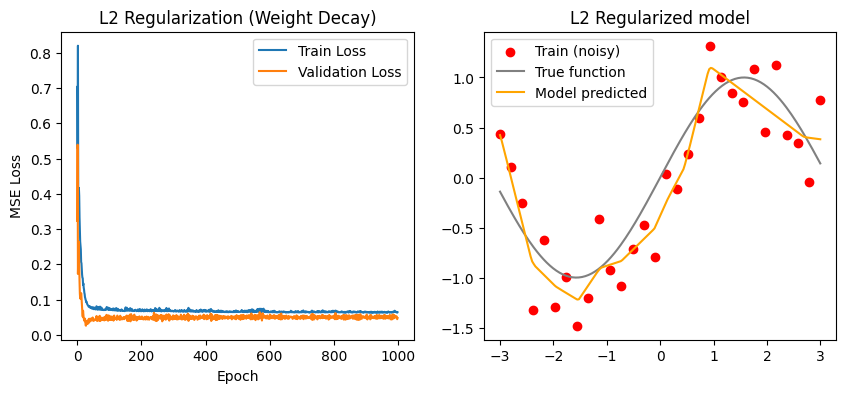

In [ ]:
model_l2 = OverfitNet()
optimizer_l2 = torch.optim.Adam(
    model_l2.parameters(),
    lr=0.01,
    weight_decay=5e-3 # 0.001, 0.01, 0.005
)

train_l2, val_l2 = train_model(model_l2, optimizer_l2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "L2 Regularization (Weight Decay)", train_l2, val_l2)

plt.subplot(1, 2, 2)
plot_model_fit(plt, "L2 Regularized model", model_l2, x_train, y_train, x_val, y_val)

📌 **Teaching Point**

* No model code changes
* Regularization is optimizer-level
* Validation curve stabilizes earlier
* Training loss no longer goes to zero

---

## **5️⃣ L1 Regularization (Manual)**

PyTorch doesn’t include L1 by default, so we manually implemented it in the training loop `train_model()` already.


### **Training Step with L1**


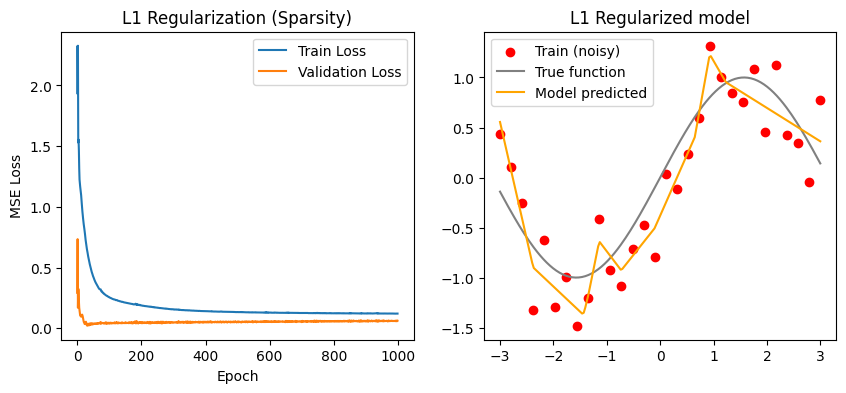

In [ ]:
model_l1 = OverfitNet()
optimizer_l1 = torch.optim.Adam(model_l1.parameters(), lr=0.01)

train_l1, val_l1 = train_model(
    model_l1,
    optimizer_l1,
    l1_lambda=1e-3
)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "L1 Regularization (Sparsity)", train_l1, val_l1)

plt.subplot(1, 2, 2)
plot_model_fit(plt, "L1 Regularized model", model_l1, x_train, y_train, x_val, y_val)

📌 **Effect**

* Many weights shrink toward zero
* Slightly harder optimization
* Sparse solutions (especially visible in linear layers)

---

## **6️⃣ Dropout Regularization**

### **Modified Architecture**


In [ ]:
class DropoutNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x)

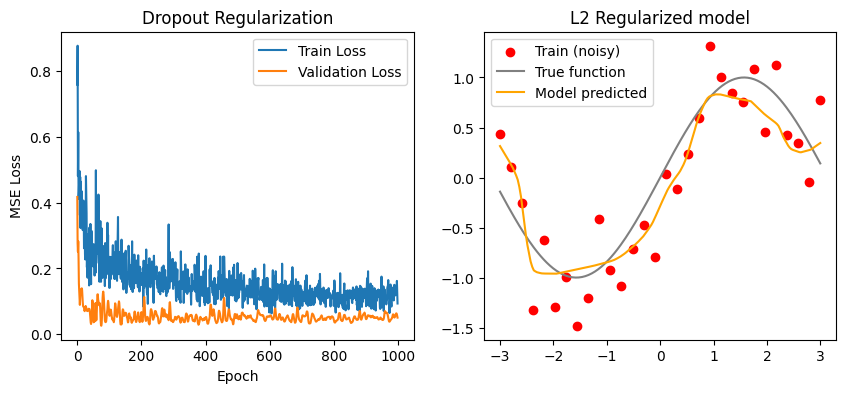

In [ ]:
model_do = DropoutNet()
optimizer_do = torch.optim.Adam(model_do.parameters(), lr=0.01)

train_do, val_do = train_model(model_do, optimizer_do)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "Dropout Regularization", train_do, val_do)

plt.subplot(1, 2, 2)
plot_model_fit(plt, "L2 Regularized model", model_do, x_train, y_train, x_val, y_val)

📌 **Things to Remember**

* Dropout only active during `.train()`
* Acts like ensemble averaging
* Training loss decreases slower
* Validation curve smoother

---

## **7️⃣ Early Stopping Regularization**

### **Simple Early Stopping Logic**

This compares validation loss against previous epochs and stops if the validation loss starts deteriorating for longer than the `patience` hyperparameter. At which point training stops and the best network parameters are used.

Early stopping triggered at 80. Best epoch is 30


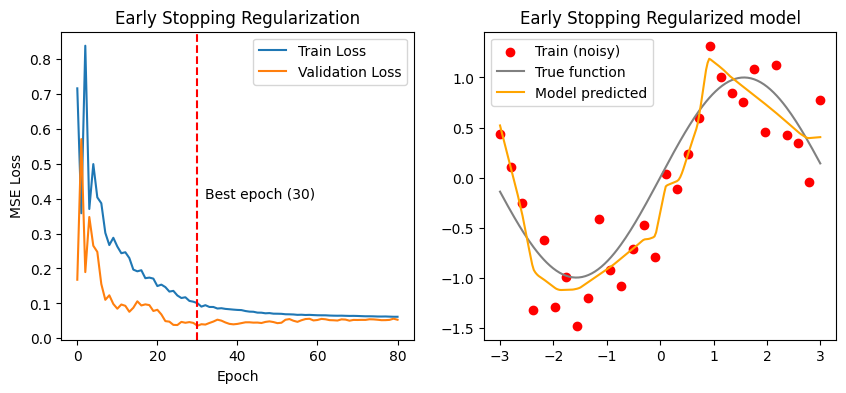

In [ ]:
model = OverfitNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

best_val = float("inf")
best_epoch = 0
patience = 50
counter = 0

train_es, val_es = [], []

for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    loss = criterion(model(x_train), y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(x_val), y_val)

    if val_loss < best_val:
        best_val = val_loss
        counter = 0
        best_state = model.state_dict()
        best_epoch = epoch
    else:
        counter += 1

    train_es.append(loss.item())
    val_es.append(val_loss.item())

    if counter >= patience:
        print(f"Early stopping triggered at {epoch}. Best epoch is {best_epoch}")
        break

# Critical: restore model to state at best loss.
model.load_state_dict(best_state)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "Early Stopping Regularization", train_es, val_es)

# point to best epoch in the  plot.
plt.axvline(x=best_epoch, color="red", linestyle="--")
plt.text(best_epoch + 2, 0.4, f"Best epoch ({best_epoch})")

plt.subplot(1, 2, 2)
plot_model_fit(plt, "Early Stopping Regularized model", model, x_train, y_train, x_val, y_val)

📌 **Key Insight**

* Stops *before* memorization dominates
* No architectural changes
* Very effective in practice

---

## **8️⃣ Regularization Comparison Summary**

| Model             | Training Loss | Validation Loss | Curve Shape             |
| ----------------- | ------------- | --------------- | ----------------------- |
| No Regularization | Very Low      | High            | Classic overfitting     |
| L2                | Medium        | Lower           | Smooth                  |
| Dropout           | Higher        | Lower           | Noisy train, smooth val |
| Early Stop        | Medium        | Best            | Clean convergence       |
| L2 + Dropout      | Medium        | Best overall    | Strong generalization   |

---

